# Detect Email Spam Model

Import used libraries

In [23]:
from dotenv import load_dotenv
load_dotenv()
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Inititate and download kaggle dataset:

In [ ]:
kaggle_api = KaggleApi()
kaggle_api.authenticate()

In [3]:
kaggle_api.dataset_download_files('purusinghvi/email-spam-classification-dataset', path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset


In [4]:
df = pd.read_csv("data/combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
X, y = df['text'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
vectorizer = CountVectorizer()
model = MultinomialNB()

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('model', model)
])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [18]:
y_test_preds = pipeline.predict(X_test)
y_test_probas = pipeline.predict_proba(X_test)
print(y_test_preds.shape, y_test_probas.shape)

(16690,) (16690, 2)


In [19]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score

# Evaluate predictions
print(f'Accuracy: {accuracy_score(y_test, y_test_preds)}')
print(f'F1 score: {f1_score(y_test, y_test_preds)}')
print(f'AUROC: {roc_auc_score(y_test, y_test_probas[:, 1])}')
print(f'AUPRC: {average_precision_score(y_test, y_test_probas[:, 1])}')

Accuracy: 0.9750149790293589
F1 score: 0.975972342264477
AUROC: 0.9940396708440722
AUPRC: 0.9919058139087228


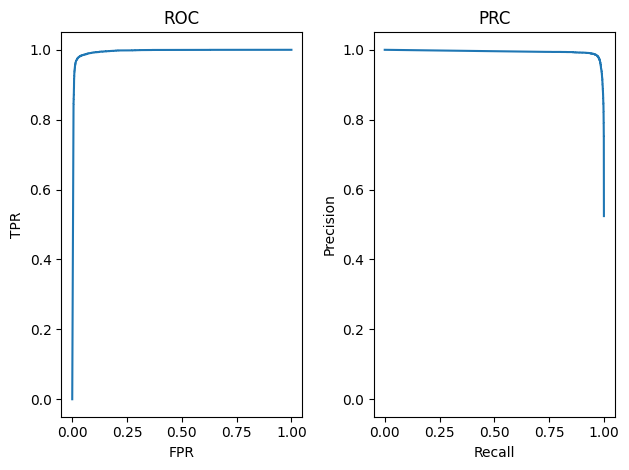

In [24]:
# To plot ROC and PRC
from sklearn.metrics import roc_curve, precision_recall_curve

# Compute FPR, TPR, Precision by iterating classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_probas[:, 1])
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probas[:, 1])

# Plot
fig, axes = plt.subplots(1, 2)
axes[0].plot(fpr, tpr)
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title('ROC')

axes[1].plot(recall, precision)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('PRC')

axes[0].set_xlim([-.05, 1.05])
axes[0].set_ylim([-.05, 1.05])
axes[1].set_xlim([-.05, 1.05])
axes[1].set_ylim([-.05, 1.05])

fig.tight_layout()
plt.show()

In [27]:
joblib.dump(pipeline, 'spam_model_pipeline.joblib')

['spam_model_pipeline.joblib']

In [25]:
emails = ["Hello, we need a meeting"]
prediction = pipeline.predict(emails)

print("Predicted label:", "Spam" if prediction == 1 else "Not Spam")

Predicted label: Not Spam
